In [1]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\TSF - 24th Feb 2024'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log
import plotly.offline as py

In [24]:
# import dataset
df = pd.read_csv('TCS.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/5/2019,2005.000000,2007.000000,1976.599976,1988.099976,1779.321777,2449622
1,3/6/2019,1989.300049,2015.000000,1985.050049,1999.599976,1789.614380,2635047
2,3/7/2019,2005.000000,2024.050049,2000.199951,2013.300049,1801.875488,2539884
3,3/8/2019,2025.000000,2033.000000,2010.050049,2022.699951,1810.288330,2031071
4,3/11/2019,2028.900024,2033.000000,2003.650024,2014.800049,1803.217896,3111689


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [26]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [27]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1235 non-null   datetime64[ns]
 1   Open       1235 non-null   float64       
 2   High       1235 non-null   float64       
 3   Low        1235 non-null   float64       
 4   Close      1235 non-null   float64       
 5   Adj Close  1235 non-null   float64       
 6   Volume     1235 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [28]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['Volume'])

0.2528871438997474

In [29]:
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Close']))

0.00020847298932672522
0.00020450938267665904


In [ ]:
# Steps: 5 Pre-requisite rule in TSF
1) Every data should be numeric in nature, not in category
2) Data type is correct or not - datetime column and target variable should be numeric
3) There should not be any missing data, if yes, first impute and then try to solve time series forecasting
4) Data should be in sequential order (Timeseries always in an ascending order)
5) Whether data has Trend, Seasonality, Error or abrupt changes or something x changes

##### Series has to be read as a daily series with Mon-Friday as Weekdays, hence frequency is defined as business day. else if you define frequency as 365, it would assume that exchange was working for all 365 days.

In [10]:
from pandas.tseries.offsets import BDay # BDay - business day (Mon-Friday)

In [30]:
df.shape

(1235, 7)

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-05,2005.000000,2007.000000,1976.599976,1988.099976,1779.321777,2449622
1,2019-03-06,1989.300049,2015.000000,1985.050049,1999.599976,1789.614380,2635047
2,2019-03-07,2005.000000,2024.050049,2000.199951,2013.300049,1801.875488,2539884
3,2019-03-08,2025.000000,2033.000000,2010.050049,2022.699951,1810.288330,2031071
4,2019-03-11,2028.900024,2033.000000,2003.650024,2014.800049,1803.217896,3111689


In [13]:
df_date = df[['Date','Volume']]

In [14]:
df_date.head()

,Date,Volume
0,2019-03-05,2449622
1,2019-03-06,2635047
2,2019-03-07,2539884
3,2019-03-08,2031071
4,2019-03-11,3111689


In [15]:
df_date.tail()

,Date,Volume
1230,2024-02-26,1379284
1231,2024-02-27,2960475
1232,2024-02-28,1939225
1233,2024-02-29,3772719
1234,2024-03-01,2043265


In [16]:
date1 = pd.date_range(start='3/5/2019', end='3/1/2024', freq=BDay())
date1

DatetimeIndex(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-18',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01'],
              dtype='datetime64[ns]', length=1304, freq='B')

In [32]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar =USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [18]:
date1 = pd.date_range(start='3/5/2019', end='3/1/2024', freq=us_bd)
date1

DatetimeIndex(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-18',
               ...
               '2024-02-16', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01'],
              dtype='datetime64[ns]', length=1251, freq='C')

In [33]:
df_final = pd.read_csv('TCS.NS.csv', parse_dates=True, squeeze=True, index_col=0)
# squeeze : True will return the index col as series

In [34]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-05,2005.000000,2007.000000,1976.599976,1988.099976,1779.321777,2449622
2019-03-06,1989.300049,2015.000000,1985.050049,1999.599976,1789.614380,2635047
2019-03-07,2005.000000,2024.050049,2000.199951,2013.300049,1801.875488,2539884
2019-03-08,2025.000000,2033.000000,2010.050049,2022.699951,1810.288330,2031071
2019-03-11,2028.900024,2033.000000,2003.650024,2014.800049,1803.217896,3111689


In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-03-05 to 2024-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


<Figure size 2000x1400 with 0 Axes>

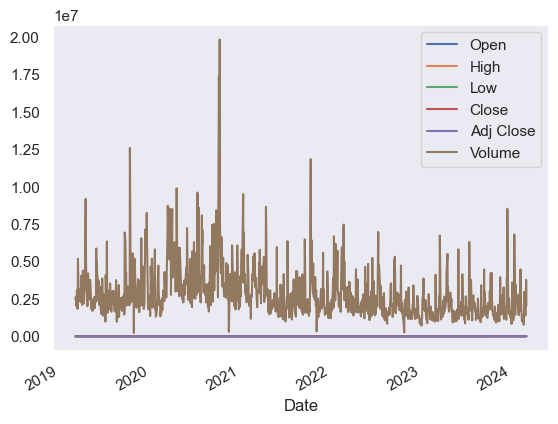

In [38]:
plt.figure(figsize=(20,14))
df_final.plot()
plt.grid()

### Plot the boxplot of the "Open" variable with respect to the different years

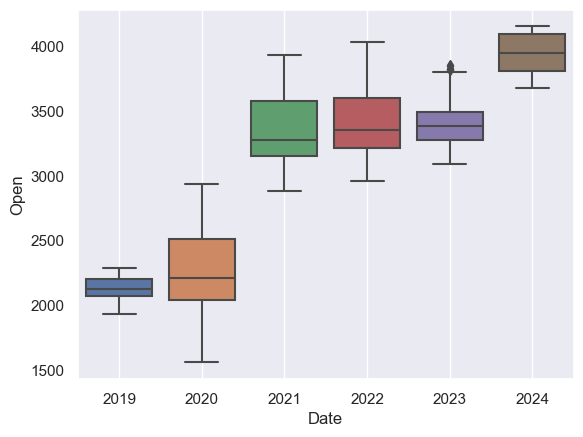

In [39]:
sns.boxplot(x = df_final.index.year, y = df_final['Open'])
plt.grid()

### Plot the boxplot of the "Open" variable with respect to the different months

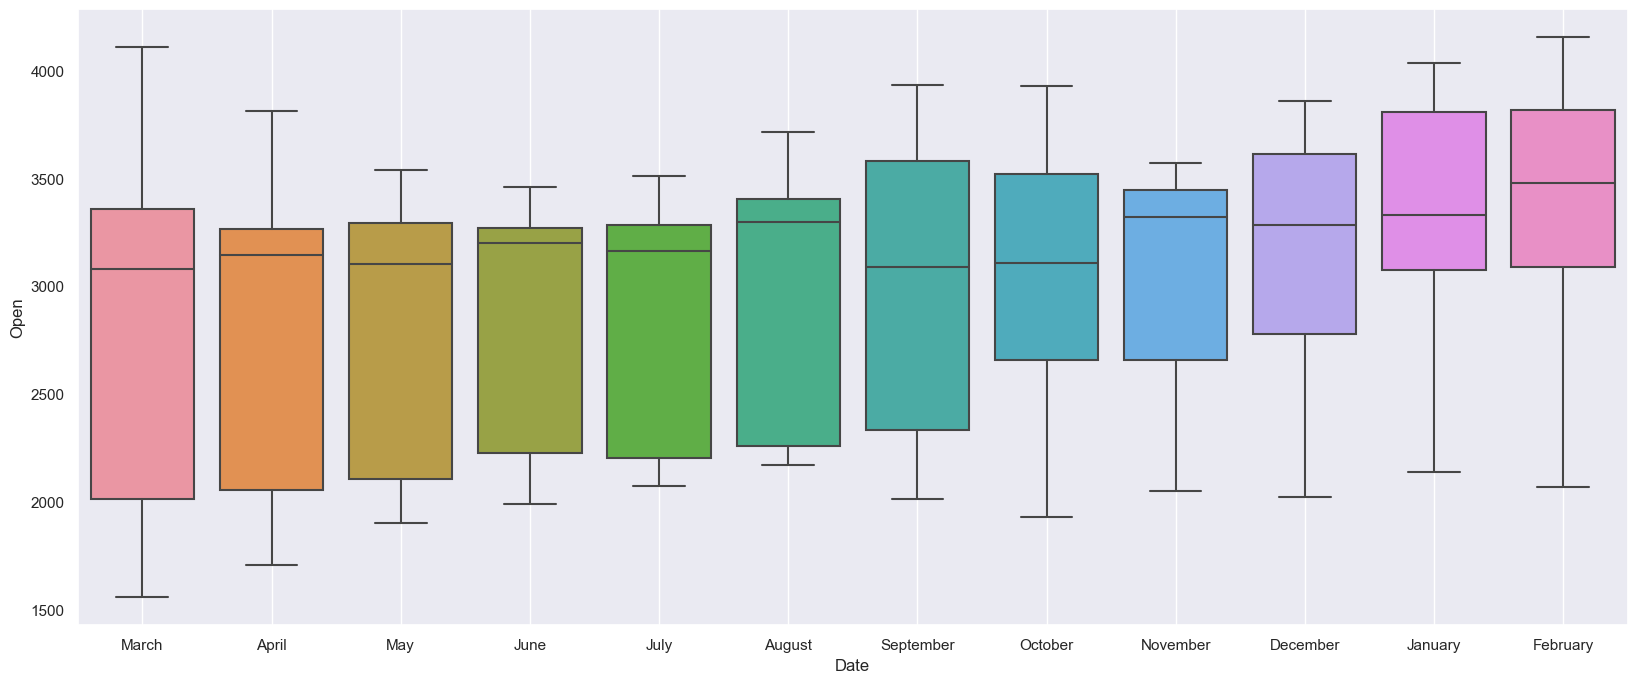

In [42]:
plt.figure(figsize=(20,8))
sns.boxplot(x = df_final.index.month_name(), y = df_final['Open'])
plt.grid()

<Figure size 2000x1200 with 0 Axes>

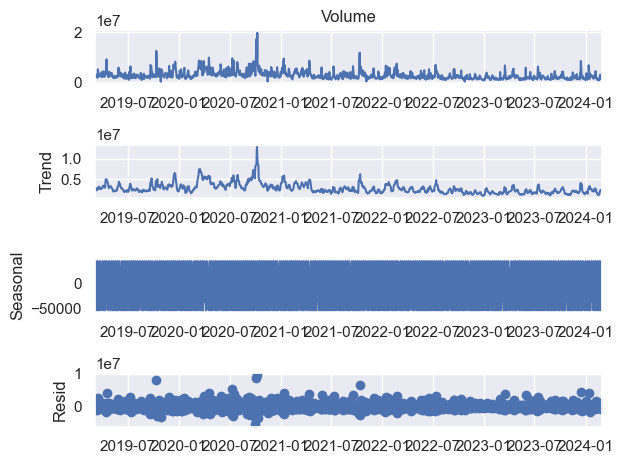

In [46]:
# Decomposition
plt.figure(figsize=(20,12))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_final['Volume'], period=5)
decomposition.plot()
plt.show()

<Figure size 2000x1200 with 0 Axes>

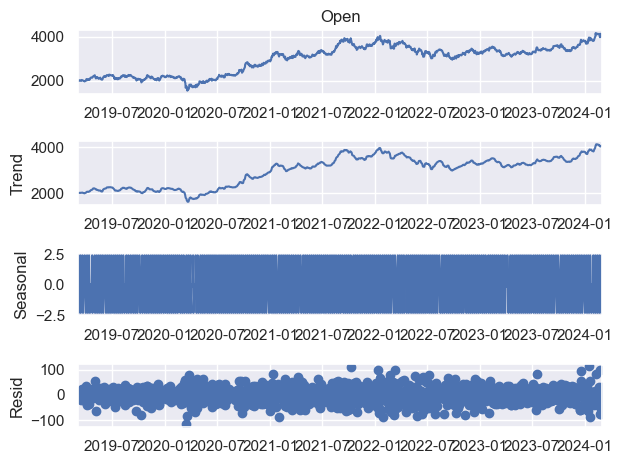

In [48]:
# Decomposition
plt.figure(figsize=(20,12))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_final['Open'], period=5)
decomposition.plot()
plt.show()

In [47]:
trend = decomposition.trend
seasonality = decomposition.seasonal
resid = decomposition.resid

print("Trend", '\n', trend.head(12),'\n')
print("Seasonal", '\n', seasonality.head(12),'\n')
print("resid", '\n', resid.head(12),'\n')

Trend 
 Date
2019-03-05          NaN
2019-03-06          NaN
2019-03-07    2553462.6
2019-03-08    2595248.2
2019-03-11    2434871.4
2019-03-12    2307993.6
2019-03-13    2938643.0
2019-03-14    2786288.2
2019-03-15    2729376.8
2019-03-18    2980977.2
2019-03-19    3229508.0
2019-03-20    2678485.4
Name: trend, dtype: float64 

Seasonal 
 Date
2019-03-05   -53171.081613
2019-03-06    14249.253346
2019-03-07    44462.414256
2019-03-08   -36219.858849
2019-03-11    30679.272859
2019-03-12   -53171.081613
2019-03-13    14249.253346
2019-03-14    44462.414256
2019-03-15   -36219.858849
2019-03-18    30679.272859
2019-03-19   -53171.081613
2019-03-20    14249.253346
Name: seasonal, dtype: float64 

resid 
 Date
2019-03-05             NaN
2019-03-06             NaN
2019-03-07   -5.804101e+04
2019-03-08   -5.279573e+05
2019-03-11    6.461383e+05
2019-03-12    4.037275e+05
2019-03-13   -1.119729e+06
2019-03-14   -9.252556e+05
2019-03-15    2.491161e+06
2019-03-18   -6.617415e+05
2019-03-19   

In [49]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-05,2005.000000,2007.000000,1976.599976,1988.099976,1779.321777,2449622
2019-03-06,1989.300049,2015.000000,1985.050049,1999.599976,1789.614380,2635047
2019-03-07,2005.000000,2024.050049,2000.199951,2013.300049,1801.875488,2539884
2019-03-08,2025.000000,2033.000000,2010.050049,2022.699951,1810.288330,2031071
2019-03-11,2028.900024,2033.000000,2003.650024,2014.800049,1803.217896,3111689


In [51]:
df_final['Year'] = df_final.index.year
df_final['Month'] = df_final.index.month
df_final['Days'] = df_final.index.day
df_final.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days
Date,,,,,,,,,
2019-03-05,2005.000000,2007.000000,1976.599976,1988.099976,1779.321777,2449622,2019,3,5
2019-03-06,1989.300049,2015.000000,1985.050049,1999.599976,1789.614380,2635047,2019,3,6
2019-03-07,2005.000000,2024.050049,2000.199951,2013.300049,1801.875488,2539884,2019,3,7
2019-03-08,2025.000000,2033.000000,2010.050049,2022.699951,1810.288330,2031071,2019,3,8
2019-03-11,2028.900024,2033.000000,2003.650024,2014.800049,1803.217896,3111689,2019,3,11


In [54]:
df = pd.read_csv('TCS.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/5/2019,2005.000000,2007.000000,1976.599976,1988.099976,1779.321777,2449622
1,3/6/2019,1989.300049,2015.000000,1985.050049,1999.599976,1789.614380,2635047
2,3/7/2019,2005.000000,2024.050049,2000.199951,2013.300049,1801.875488,2539884
3,3/8/2019,2025.000000,2033.000000,2010.050049,2022.699951,1810.288330,2031071
4,3/11/2019,2028.900024,2033.000000,2003.650024,2014.800049,1803.217896,3111689


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [56]:
df['Time_stamp'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1235 non-null   object        
 1   Open        1235 non-null   float64       
 2   High        1235 non-null   float64       
 3   Low         1235 non-null   float64       
 4   Close       1235 non-null   float64       
 5   Adj Close   1235 non-null   float64       
 6   Volume      1235 non-null   int64         
 7   Time_stamp  1235 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 77.3+ KB


In [57]:
df_final_model = df.set_index('Time_stamp')
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_stamp,,,,,,,
2019-03-05,3/5/2019,2005.000000,2007.000000,1976.599976,1988.099976,1779.321777,2449622
2019-03-06,3/6/2019,1989.300049,2015.000000,1985.050049,1999.599976,1789.614380,2635047
2019-03-07,3/7/2019,2005.000000,2024.050049,2000.199951,2013.300049,1801.875488,2539884
2019-03-08,3/8/2019,2025.000000,2033.000000,2010.050049,2022.699951,1810.288330,2031071
2019-03-11,3/11/2019,2028.900024,2033.000000,2003.650024,2014.800049,1803.217896,3111689


In [58]:
df_final_model['Year'] = df_final_model.index.year
df_final_model['Month'] = df_final_model.index.month
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2019-03-05,3/5/2019,2005.000000,2007.000000,1976.599976,1988.099976,1779.321777,2449622,2019,3
2019-03-06,3/6/2019,1989.300049,2015.000000,1985.050049,1999.599976,1789.614380,2635047,2019,3
2019-03-07,3/7/2019,2005.000000,2024.050049,2000.199951,2013.300049,1801.875488,2539884,2019,3
2019-03-08,3/8/2019,2025.000000,2033.000000,2010.050049,2022.699951,1810.288330,2031071,2019,3
2019-03-11,3/11/2019,2028.900024,2033.000000,2003.650024,2014.800049,1803.217896,3111689,2019,3


In [60]:
df_final_model.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2024-02-26,2/26/2024,4036.000000,4050.000000,3982.750000,4001.050049,4001.050049,1379284,2024,2
2024-02-27,2/27/2024,3999.000000,4124.000000,3999.000000,4104.399902,4104.399902,2960475,2024,2
2024-02-28,2/28/2024,4095.600098,4154.899902,4089.000000,4118.950195,4118.950195,1939225,2024,2
2024-02-29,2/29/2024,4099.000000,4138.100098,4064.550049,4095.100098,4095.100098,3772719,2024,2
2024-03-01,3/1/2024,4107.200195,4140.000000,4086.800049,4094.350098,4094.350098,2043265,2024,3


In [59]:
df_final_model.shape

(1235, 9)

In [62]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2023-6-01')]
train.shape

(1048, 9)

In [63]:
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2023-6-01')]
test.shape

(187, 9)

In [64]:
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2023-05-25,5/25/2023,3294.000000,3306.000000,3267.100098,3293.500000,3237.291748,1374917,2023,5
2023-05-26,5/26/2023,3293.500000,3338.649902,3291.000000,3328.899902,3272.087158,1791115,2023,5
2023-05-29,5/29/2023,3360.800049,3372.000000,3312.000000,3320.350098,3263.683594,1210372,2023,5
2023-05-30,5/30/2023,3315.000000,3326.949951,3301.350098,3316.199951,3259.604248,1344224,2023,5
2023-05-31,5/31/2023,3309.000000,3327.699951,3265.149902,3289.500000,3233.359863,5815424,2023,5


In [65]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2023-06-01,6/1/2023,3314.00,3340.000000,3297.500000,3324.000000,3267.271240,1177314,2023,6
2023-06-02,6/2/2023,3326.25,3335.899902,3297.449951,3305.600098,3249.185303,2030661,2023,6
2023-06-05,6/5/2023,3315.00,3327.000000,3285.050049,3288.899902,3232.770020,1861468,2023,6
2023-06-06,6/6/2023,3280.00,3288.850098,3220.600098,3232.300049,3177.136230,2022849,2023,6
2023-06-07,6/7/2023,3253.00,3278.850098,3241.000000,3274.899902,3219.008789,1567196,2023,6


In [66]:
test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2024-02-26,2/26/2024,4036.000000,4050.000000,3982.750000,4001.050049,4001.050049,1379284,2024,2
2024-02-27,2/27/2024,3999.000000,4124.000000,3999.000000,4104.399902,4104.399902,2960475,2024,2
2024-02-28,2/28/2024,4095.600098,4154.899902,4089.000000,4118.950195,4118.950195,1939225,2024,2
2024-02-29,2/29/2024,4099.000000,4138.100098,4064.550049,4095.100098,4095.100098,3772719,2024,2
2024-03-01,3/1/2024,4107.200195,4140.000000,4086.800049,4094.350098,4094.350098,2043265,2024,3


In [67]:
train_final = train[['Volume']]
test_final = test[['Volume']]

In [68]:
train_final.head()

,Volume
Time_stamp,
2019-03-05,2449622
2019-03-06,2635047
2019-03-07,2539884
2019-03-08,2031071
2019-03-11,3111689


In [69]:
test_final.tail()

,Volume
Time_stamp,
2024-02-26,1379284
2024-02-27,2960475
2024-02-28,1939225
2024-02-29,3772719
2024-03-01,2043265


# Check for stationarity of the series at alpha <= 0.05 using appropriate statistical test(hypothetical test)

In [73]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

# there are two methods avaiable - hypothesis testing, rolling stats
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()
    
    # plot rolling stats
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='rolling mean')
    std = plt.plot(rolstd, color='black', label='rolling std')
    plt.legend(loc='best')
    plt.title("Rolling Mean and Stadard Deviation - Stationary or Not!!")
    plt.show(block=False)
    
    # Perform Dickey Fuller Test
    print("Results of Dickey Fuller Test :")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF Test stats', 'P-Value','#Lags', 'No. of Observation'])
    for key, value in dftest[4].items():
        dfoutput['Critical values (%s)'%key] = value
    print(dfoutput, '\n')

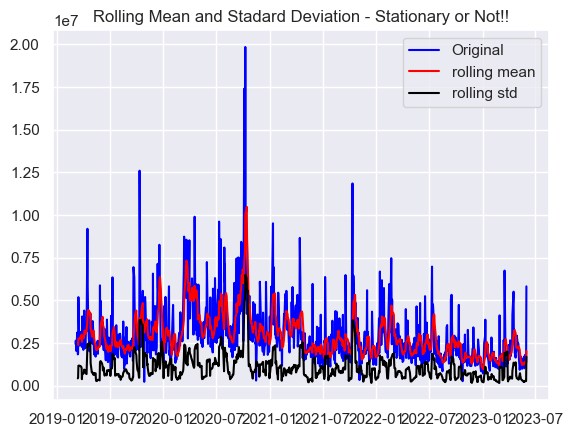

Results of Dickey Fuller Test :
ADF Test stats          -6.040931e+00
P-Value                  1.346577e-07
#Lags                    7.000000e+00
No. of Observation       1.040000e+03
Critical values (1%)    -3.436653e+00
Critical values (5%)    -2.864323e+00
Critical values (10%)   -2.568252e+00
dtype: float64 



In [74]:
test_stationarity(train_final['Volume'])

In [75]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or Not")
    labels = ['ADF Test stats', 'P-Value','#Lags', 'No. of Observation']
    
    for i, j in zip(result, labels):
        print(j + " :-->" + str(i) )
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothesis and my times series is non-stationary")

In [76]:
check_adftest(train_final['Volume'])

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->-6.0409308076240364
P-Value :-->1.3465766499909795e-07
#Lags :-->7
No. of Observation :-->1040
Strong evidence against null hypothesis and my time series is Stationary


# TSeries is Stationary at 5% alpha value as per Dickey Fuller Test 

In [77]:
import itertools
p = q = range(0,3)
d = range(0,1)
pdq = list(itertools.product(p, d, q)) # trend (pdq)

model_pdq = [(x[0], x[1],x[2], 5) for x in list(itertools.product(p, d, q))] # seasonality (PDQ)
print("Example of parameter combinations for Model.....")
print('Model : {}{}'.format(pdq[1], model_pdq[1]))
print('Model : {}{}'.format(pdq[1], model_pdq[2]))
print('Model : {}{}'.format(pdq[1], model_pdq[0]))
print('Model : {}{}'.format(pdq[0], model_pdq[1]))
print('Model : {}{}'.format(pdq[2], model_pdq[1]))

Example of parameter combinations for Model.....
Model : (0, 0, 1)(0, 0, 1, 5)
Model : (0, 0, 1)(0, 0, 2, 5)
Model : (0, 0, 1)(0, 0, 0, 5)
Model : (0, 0, 0)(0, 0, 1, 5)
Model : (0, 0, 2)(0, 0, 1, 5)


# Building ARIMA Model

In [78]:
# creating an empty DataFrame with column names
dfobj = pd.DataFrame(columns=['Param', 'AIC'])
dfobj

,Param,AIC


In [80]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    mod = ARIMA(train_final['Volume'], order=param)
    results_ARIMA = mod.fit()
    print("ARIMA{} - AIC :{}".format(param, results_ARIMA.aic))
    dfobj = dfobj.append({'param':param, 'AIC':results_ARIMA.aic}, ignore_index=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 0) - AIC :39325.42547757208


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 1) - AIC :32858.72173286214


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 2) - AIC :32819.37840001695
ARIMA(1, 0, 0) - AIC :32748.45822861771


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date

ARIMA(1, 0, 1) - AIC :32665.568108813826


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 2) - AIC :32654.458793622012


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(2, 0, 0) - AIC :32712.333056998363


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(2, 0, 1) - AIC :32655.212014523157


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(2, 0, 2) - AIC :32654.7643348715


In [81]:
dfobj.sort_values(by=['AIC'])

,Param,AIC,param
5,NaN,32654.458794,"(1, 0, 2)"
8,NaN,32654.764335,"(2, 0, 2)"
7,NaN,32655.212015,"(2, 0, 1)"
4,NaN,32665.568109,"(1, 0, 1)"
6,NaN,32712.333057,"(2, 0, 0)"
3,NaN,32748.458229,"(1, 0, 0)"
2,NaN,32819.378400,"(0, 0, 2)"
1,NaN,32858.721733,"(0, 0, 1)"
0,NaN,39325.425478,"(0, 0, 0)"


In [82]:
# ARIMA (1, 0, 2) has the lowest AIC
model = ARIMA(train_final['Volume'], order=(1,0,2),enforce_stationarity=False,enforce_invertibility=False)
results_ARIMA = model.fit()
print(results_ARIMA.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1048
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -16276.601
Date:                Sat, 02 Mar 2024   AIC                          32563.202
Time:                        12:27:44   BIC                          32587.961
Sample:                             0   HQIC                         32572.592
                               - 1048                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.917e+06   7.43e-10   3.92e+15      0.000    2.92e+06    2.92e+06
ar.L1          0.9463      0.013     74.935      0.000       0.922       0.971
ma.L1         -0.5891      0.026    -22.847      0.0

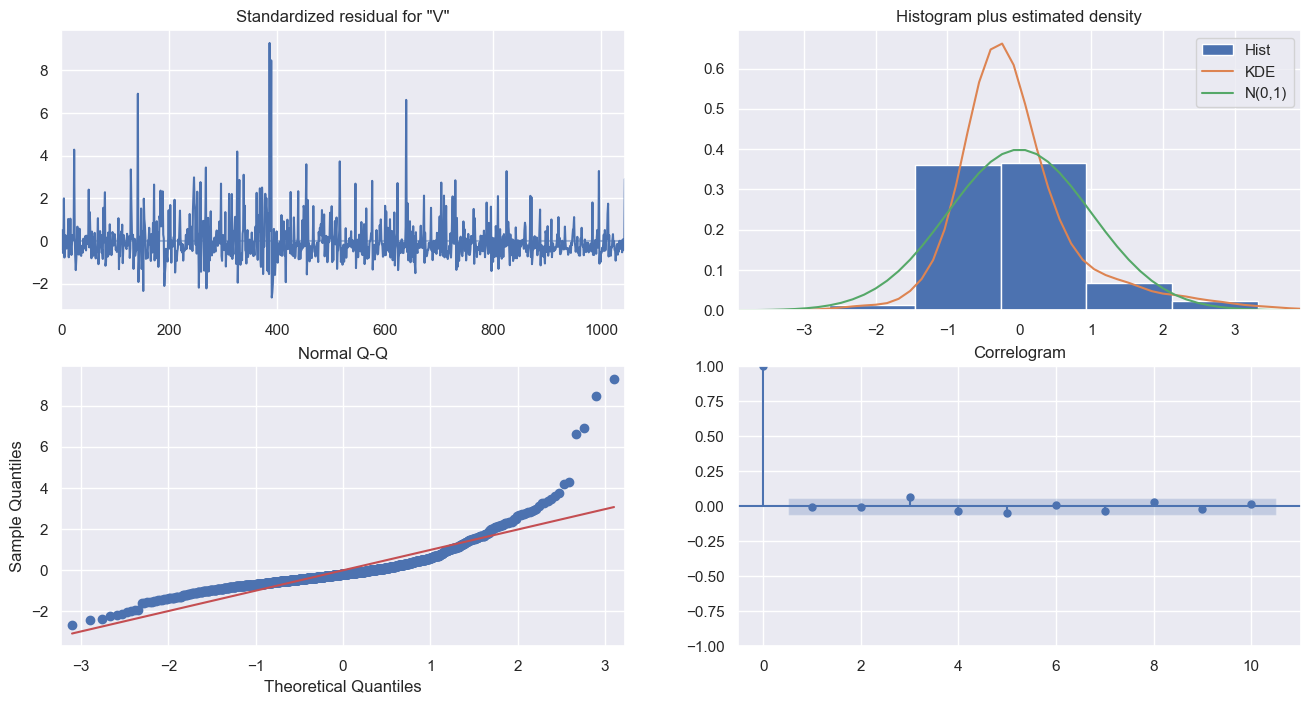

In [84]:
results_ARIMA.plot_diagnostics(figsize=(16,8))
plt.show()

In [86]:
final_hat_avg = test_final.copy()
pred_ARIMA = results_ARIMA.forecast(steps=len(test_final))
pred_ARIMA

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



1048    3.263291e+06
1049    2.681201e+06
1050    2.693864e+06
1051    2.705847e+06
1052    2.717187e+06
            ...     
1230    2.917030e+06
1231    2.917031e+06
1232    2.917031e+06
1233    2.917032e+06
1234    2.917032e+06
Name: predicted_mean, Length: 187, dtype: float64

In [85]:
len(test_final)

187

In [87]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Volume, pred_ARIMA, squared=False))
print(rmse)

1167.3586190228277


In [88]:
# calculate MAPE
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual))*100

In [89]:
mape = calculate_mape(test_final.Volume, pred_ARIMA)
print("MAPE :", mape)

MAPE : 76.80171949236288


In [90]:
resultDF = pd.DataFrame({'Test RMSE' : rmse}, index=['ARIMA(1, 0, 2)'])
resultDF

,Test RMSE
"ARIMA(1, 0, 2)",1167.358619


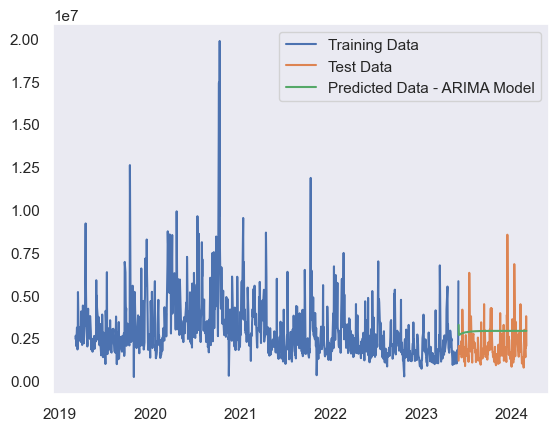

In [91]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA Model')
plt.legend(loc='best')
plt.grid()

# Build SARIMA Model

In [92]:
# creating an empty DataFrame with column names
dfobj2 = pd.DataFrame(columns=['Param', 'seasonal','AIC'])
dfobj2

,Param,seasonal,AIC


In [95]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        model = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=param, seasonal_order=param_seasonal,
                                         enforce_stationarity=False,enforce_invertibility=False)
        results_SARIMA = model.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfobj2 = dfobj2.append({'Param':param, "seasonal":param_seasonal, 'AIC':results_SARIMA.aic}, ignore_index=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:34460.65769573934
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:33879.119577046535


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:33574.01888940562


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:33160.21724404655


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:32794.75640334122


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:32620.094957982656


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:32805.46984304224


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:32646.830423591535


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:32612.355510667257
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:33889.991548216334


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:33617.3092799735


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:33388.8300234927


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:33558.34655182397


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:33402.531558350645


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:33241.52012236272


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:33344.9056943351


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:33305.79976481021


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:33243.982547954685
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:33735.83618829531


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:33517.804900270436


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:33321.350856738325


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:33552.456349683955


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:33366.607582137585


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:33205.908668404525


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:33342.558881424484


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:33302.57562711834


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:33208.01116666998
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:32932.79471805483


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:32781.577723087816


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:32617.889359636996


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:32781.54396270217


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:32599.195643503506


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:32440.58446405051


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:32617.47009018433


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:32440.66395045304


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:32442.45026480921


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:32635.6685403528


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:32477.891562013243


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:32324.24246602074


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:32508.557895026803


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:32478.787330882024


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:32324.402417545465


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:32354.65967049974


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:32354.64409897548


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:32324.163090820475


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:32580.815887756246


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:32428.351709792307


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:32274.55064780338


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:32489.173811265657


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:32427.92741282426


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:32273.939040267018


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:32335.22101472952


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:32334.6834901091


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:32273.033419963016


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:32775.15136064486


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:32654.207162447205


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:32496.765076755182


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:32623.559766752736


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:32533.87907468592


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:32405.972054674723


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:32466.138715215875


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:32374.486772814686


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:32372.733506319


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:32610.951282216112


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:32459.21372512132


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:32305.58997389391


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:32459.318698942487


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:32460.767568025534


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:32306.553500026603


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:32305.621208666285


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:32306.64028326085


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:32306.45897598011
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:32579.714099117904


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:32429.119040926988


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:32275.139829302414


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:32459.50791224792


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:32427.76001292266


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:32273.692324666325


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:32305.506963045642


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:32303.90657733666


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:32272.126756491394


In [97]:
dfobj2.sort_values(by=['AIC'])

,Param,seasonal,AIC,param
80,NaN,"(2, 0, 2, 5)",32272.126756,"(2, 0, 2)"
161,"(2, 0, 2)","(2, 0, 2, 5)",32272.126756,NaN
134,"(1, 0, 2)","(2, 0, 2, 5)",32273.033420,NaN
53,NaN,"(2, 0, 2, 5)",32273.033420,"(1, 0, 2)"
158,"(2, 0, 2)","(1, 0, 2, 5)",32273.692325,NaN
...,...,...,...,...
82,"(0, 0, 0)","(0, 0, 1, 5)",33879.119577,NaN
9,NaN,"(0, 0, 0, 5)",33889.991548,"(0, 0, 1)"
90,"(0, 0, 1)","(0, 0, 0, 5)",33889.991548,NaN
81,"(0, 0, 0)","(0, 0, 0, 5)",34460.657696,NaN
